In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import statistics
from numpy.lib.stride_tricks import as_strided
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [21]:
data = pd.read_csv("./outputs/updated_data_02.csv")#, header=None, names=["timestamp","chan0_raw","chan1_raw","chan0_hp","chan1_hp","quat_x","quat_y","quat_z","quat_w","gyro_x","gyro_y","gyro_z","acc_x","acc_y","acc_z","label","rep","trial"])
data2 = data[["chan0_hp","chan1_hp","gyro_x","gyro_y","gyro_z","acc_x","acc_y","acc_z","quat_x","quat_y","quat_z","quat_w"]]


In [22]:
# Instantiate our StandardScaler
ss = StandardScaler()

# Standardize feature data
data_scaled = ss.fit_transform(data2)

In [23]:
# Instantiate PCA.
pca = PCA(random_state = 42)

# Fit PCA
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

# Transform PCA
data_pca = pca.transform(data_scaled)

In [24]:
var_exp = pca.explained_variance_ratio_
print(f'Explained variance: {np.round(var_exp,3)}')

# Generate the cumulative explained variance.
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance: {np.round(cum_var_exp,3)}')

Explained variance: [0.178 0.15  0.118 0.091 0.088 0.08  0.078 0.072 0.052 0.044 0.04  0.01 ]
Cumulative explained variance: [0.178 0.328 0.446 0.536 0.624 0.704 0.782 0.854 0.905 0.949 0.99  1.   ]


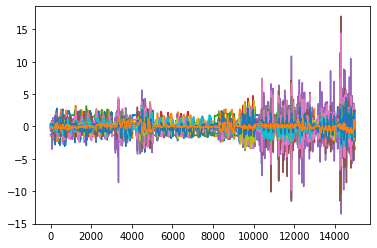

In [25]:
plt.plot(data_pca)

In [26]:
tsne = TSNE(n_components=2, random_state=42)

tsne_obj= tsne.fit_transform(data_pca)

In [27]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1]})

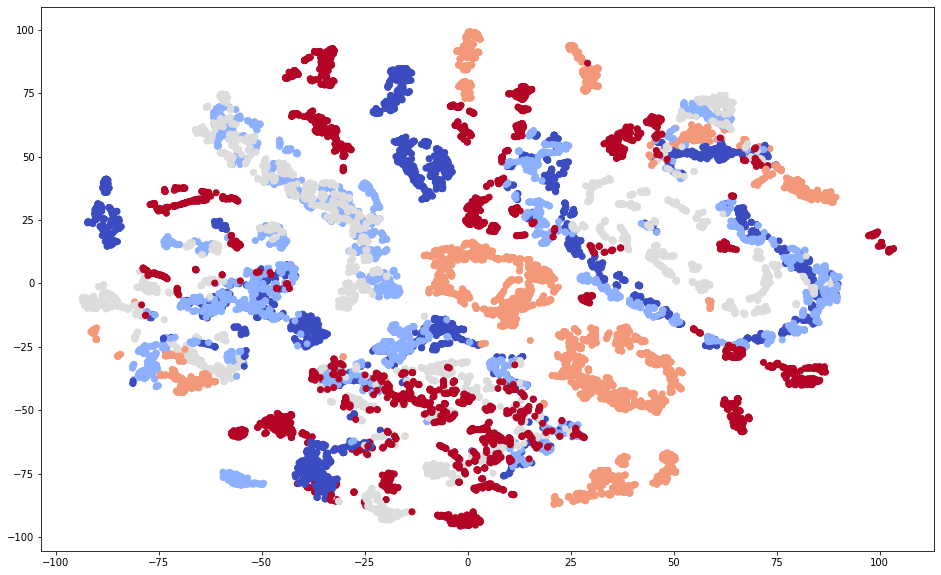

In [33]:
plt.figure(figsize=(16, 10))
plt.scatter(tsne_df.X, tsne_df.Y, c=data.label, cmap=)

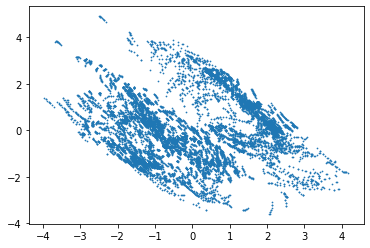

In [18]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], s=0.5)